In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [23]:


# For a CSV file with a semicolon (;) as the delimiter
data = pd.read_csv('6.csv', delimiter=';')

# Alternatively, using 'sep' (same as 'delimiter')
data = pd.read_csv('6.csv', sep=';')

# Check the first few rows
print(data.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [25]:
data['default'] = data['default'].map({'no':0,'yes':1,'unknown':0})
data['y'] = data['y'].map({'no':0,'yes':1})

In [26]:
# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
print(X_train.dtypes)  # Check data types of columns
print(X_train.select_dtypes(include=['object']).head())  # Show sample categorical values


age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object
              job  marital  education housing loan   contact month poutcome
4290     services  married   tertiary      no   no  cellular   jul  failure
4155      unknown   single  secondary      no   no   unknown   jun  unknown
2092     services  married  secondary      no   no  cellular   jul  unknown
2141  blue-collar  married  secondary     yes  yes  cellular   jul  unknown
2553   management  married   tertiary     yes   no  cellular   may  unknown


In [30]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [31]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
y_pred = rf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8950276243093923


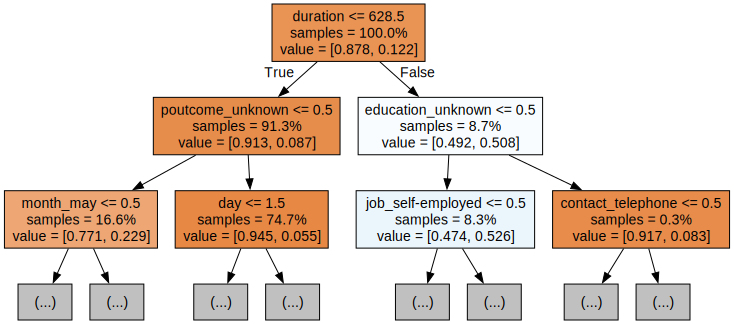

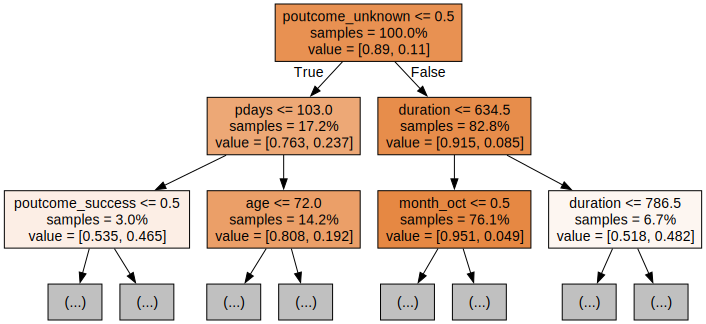

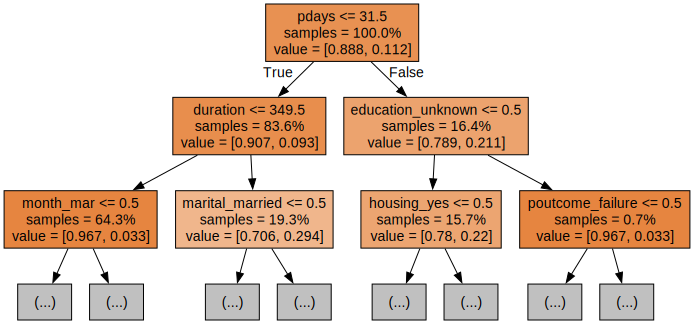

In [36]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [37]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A0C79B5A00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A0C79B5880>})

In [38]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 168}


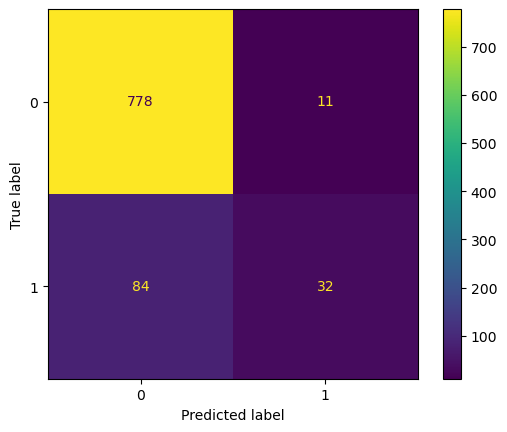

In [39]:
 #Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();